<a href="https://colab.research.google.com/github/kul-swat/EIP-4/blob/master/Session-1/Assignment_1_EIP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
# !pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


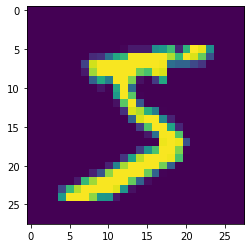

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, activation='relu', input_shape=(28,28,1)))  # 26x26x16
model.add(Convolution2D(32,3, activation='relu')) # 24,24,32
model.add(Convolution2D(64,3, activation='relu')) #22,22,64
model.add(Convolution2D(128,3))  #20,20,128

model.add(MaxPooling2D(pool_size=(2, 2))) #10,10,128
model.add(Convolution2D(16, 1, activation='relu')) #10,10,16

model.add(Convolution2D(10,10)) # 1,1,10

model.add(Flatten())
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        2064      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, validation_data=(X_test, Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.1421 - acc: 0.9572 - val_loss: 0.0551 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0530 - acc: 0.9836 - val_loss: 0.0413 - val_acc: 0.9874
Epoch 3/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0395 - acc: 0.9876 - val_loss: 0.0415 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0312 - acc: 0.9894 - val_loss: 0.0381 - val_acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0250 - acc: 0.9923 - val_loss: 0.0382 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0231 - acc: 0.9921 - val_loss: 0.0416 - val_acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0183 - acc: 0.9937 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.033159570390683256, 0.9917]


## Maximum validation accuracy reached is 99.17% at 10th Epoch

In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[2.02850804e-18 1.70087297e-18 3.05493547e-11 3.25096929e-11
  1.17266079e-22 4.06639364e-21 1.19872447e-32 1.00000000e+00
  1.22823737e-18 1.31546354e-11]
 [4.55559631e-17 1.30930488e-16 1.00000000e+00 6.21641078e-18
  8.59325513e-16 1.06823875e-19 1.01076594e-14 3.21162667e-17
  6.98862300e-13 9.09486510e-23]
 [1.19552321e-16 9.99999404e-01 7.80390010e-08 3.29382008e-12
  3.68614685e-08 1.64719449e-09 6.23668326e-13 4.81708014e-07
  6.27246166e-09 1.27011262e-13]
 [1.00000000e+00 3.85397179e-18 2.27046271e-09 3.08935539e-18
  2.61595948e-13 4.71420646e-12 5.22501065e-09 1.38459230e-10
  9.69342870e-11 3.35143433e-08]
 [2.36388884e-18 2.24343236e-21 3.24800938e-17 1.94348638e-20
  1.00000000e+00 5.18586062e-21 1.07771112e-17 3.58221510e-16
  6.51137130e-12 9.54858154e-13]
 [4.38315686e-18 9.99999046e-01 8.13094516e-08 1.18743372e-14
  4.38681536e-09 1.66203368e-12 7.18902538e-16 8.34958371e-07
  1.50359369e-09 1.41183636e-12]
 [2.15608213e-20 3.61205884e-13 7.82948095e-10 6.73737940e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

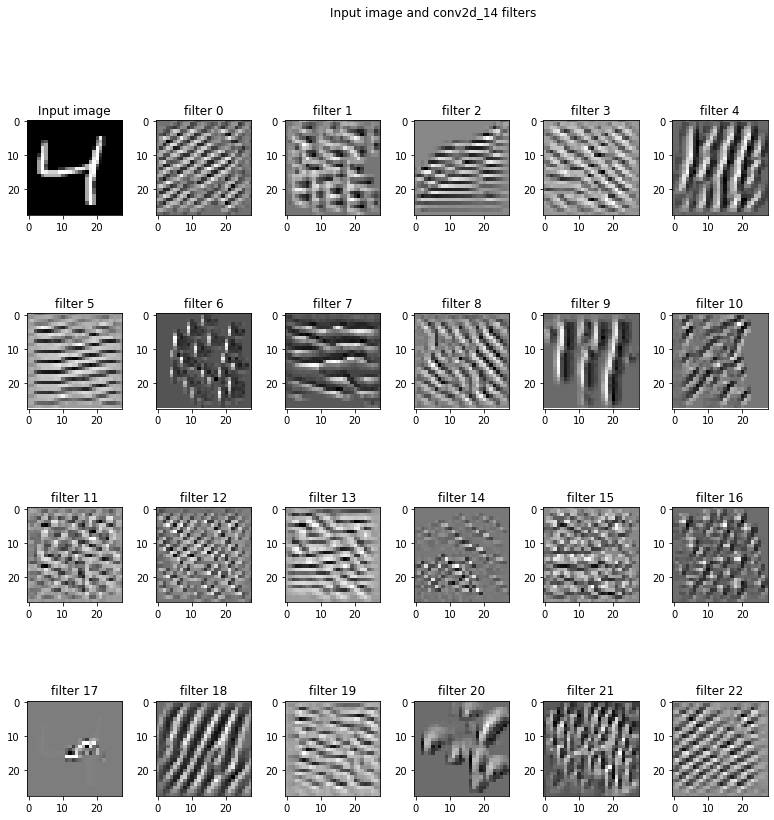

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()